In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

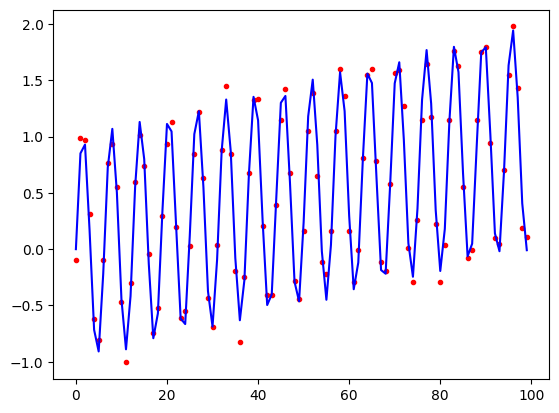

In [93]:
data_len = 1000
data_time_series = np.sin(np.arange(data_len)) + np.random.normal(0,0.1, data_len) + np.arange(data_len)/100

plt.plot(data_time_series[0:100], 'r.')
plt.plot(range(100), np.sin(np.arange(100))+np.arange(100)/100, 'b')
plt.show()

In [94]:
data_matrix = []
seq_len = 3

for i in range(0, data_len - seq_len):
  tmp_data = data_time_series[i:i+seq_len+1]
  data_matrix.append(tmp_data)

data_matrix_np = np.array(data_matrix)
print(data_matrix_np.shape)
print(data_matrix_np)

(997, 4)
[[-0.09596897  0.99187925  0.96635303  0.31587144]
 [ 0.99187925  0.96635303  0.31587144 -0.61755041]
 [ 0.96635303  0.31587144 -0.61755041 -0.80896712]
 ...
 [10.97986398 10.68434229  9.84100076  9.0970956 ]
 [10.68434229  9.84100076  9.0970956   9.1143897 ]
 [ 9.84100076  9.0970956   9.1143897  10.0081783 ]]


In [95]:
# data 전처리
x = data_matrix_np[:, 0:seq_len]
y = data_matrix_np[:, seq_len]

n_train_data = 750

x_train = x[0:n_train_data, :]
y_train = y[0:n_train_data]
x_test = x[n_train_data:x.shape[0], :]
y_test = y[n_train_data:y.shape[0]]

In [96]:
rnn_sequence_len = 4
data_dim = 3

x = data_matrix_np[0:data_matrix_np.shape[0]-1, 0:data_dim]
y = data_matrix_np[0:data_matrix_np.shape[0]-1, data_dim]

print(x.shape)
print(y.shape)

x = np.reshape(x, (-1, rnn_sequence_len, data_dim))
y = np.reshape(y, (-1, rnn_sequence_len, 1))
print(x.shape)
print(y.shape)

(996, 3)
(996,)
(249, 4, 3)
(249, 4, 1)


In [97]:
n_train_data = 200
x_train = x[0:n_train_data, :]
y_train = y[0:n_train_data]
x_test = x[n_train_data: x.shape[0], :]
y_test = y[n_train_data: y.shape[0]]

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(200, 4, 3)
(49, 4, 3)
(200, 4, 1)
(49, 4, 1)


In [100]:
from keras import layers, models

input_shape = (x_train[0].shape)

input = layers.Input(input_shape)
rnn_layer = layers.LSTM(12, return_sequences=True)(input)
output1= layers.TimeDistributed(layers.Dense(10, activation='linear'))(rnn_layer)
output2 = layers.TimeDistributed(layers.Dense(1, activation='linear'))(output1)

rnn_func = models.Model(input, output2)

rnn_func.compile(optimizer = 'Adam', loss = 'mean_squared_error', metrics = ['mean_squared_error'])
rnn_func.summary()

Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 4, 3)]            0         
                                                                 
 lstm_11 (LSTM)              (None, 4, 12)             768       
                                                                 
 time_distributed_9 (TimeDis  (None, 4, 10)            130       
 tributed)                                                       
                                                                 
 time_distributed_10 (TimeDi  (None, 4, 1)             11        
 stributed)                                                      
                                                                 
Total params: 909
Trainable params: 909
Non-trainable params: 0
_________________________________________________________________


In [101]:
history = rnn_func.fit(x_train, y_train, validation_data = [x_test, y_test], batch_size = 16, epochs = 100)

Epoch 1/100
13/13 [==============================] - 3s 41ms/step - loss: 20.2424 - mean_squared_error: 20.2424 - val_loss: 76.0632 - val_mean_squared_error: 76.0632
Epoch 2/100
13/13 [==============================] - 0s 7ms/step - loss: 17.1316 - mean_squared_error: 17.1316 - val_loss: 68.4651 - val_mean_squared_error: 68.4651
Epoch 3/100
13/13 [==============================] - 0s 7ms/step - loss: 14.1175 - mean_squared_error: 14.1175 - val_loss: 59.8563 - val_mean_squared_error: 59.8563
Epoch 4/100
13/13 [==============================] - 0s 7ms/step - loss: 11.0627 - mean_squared_error: 11.0627 - val_loss: 49.4372 - val_mean_squared_error: 49.4372
Epoch 5/100
13/13 [==============================] - 0s 9ms/step - loss: 8.1802 - mean_squared_error: 8.1802 - val_loss: 38.4124 - val_mean_squared_error: 38.4124
Epoch 6/100
13/13 [==============================] - 0s 9ms/step - loss: 5.7776 - mean_squared_error: 5.7776 - val_loss: 29.1636 - val_mean_squared_error: 29.1636
Epoch 7/100
1

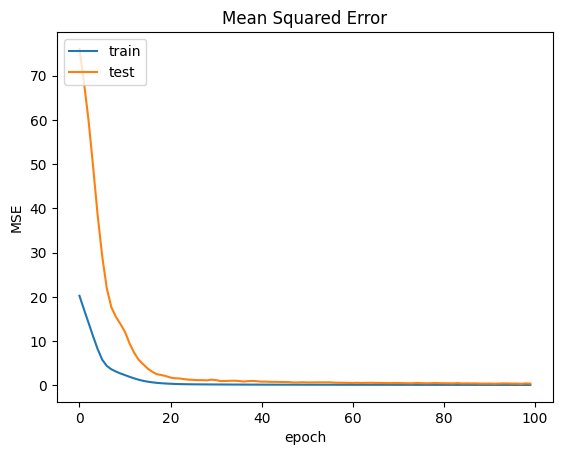

In [102]:
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('Mean Squared Error')
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

2/2 [==============================] - 0s 6ms/step


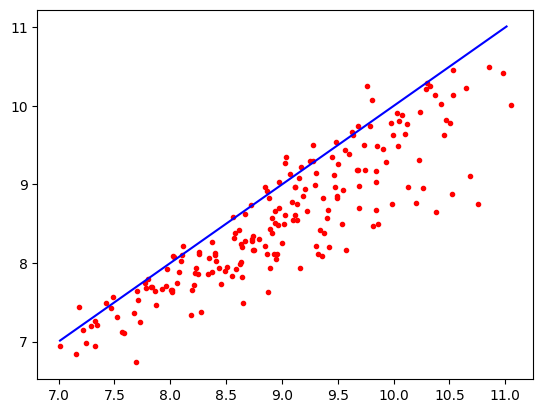

In [103]:
y_test_reshape = np.reshape(y_test, (-1, 1))
plt.plot(y_test_reshape, np.reshape(rnn_func.predict(x_test), (-1, 1)), 'r.')
plt.plot(np.arange(min(y_test_reshape), max(y_test_reshape)), 
         np.arange(min(y_test_reshape), max(y_test_reshape)), 'b')
plt.show()

2/2 [==============================] - 0s 5ms/step


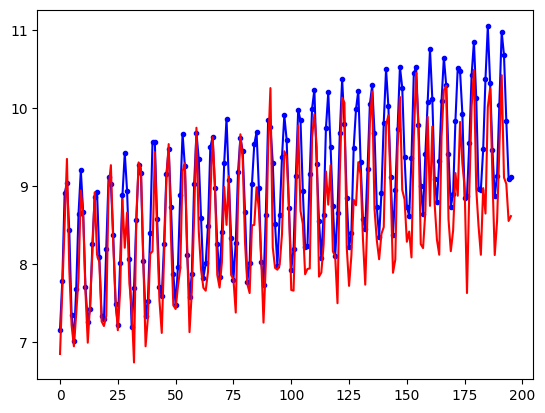

In [104]:
plt.plot(range(y_test_reshape.shape[0]), y_test_reshape, 'b.-')
plt.plot(range(y_test_reshape.shape[0]), np.reshape(rnn_func.predict(x_test), (-1, 1)), 'r-')
plt.show()

In [72]:
# model 2

In [83]:
data_matrix = []

for i in range(0, data_len - data_dim * rnn_sequence_len):
  tmp_data = data_time_series[i:i+data_dim * rnn_sequence_len + 1]
  data_matrix.append(tmp_data)

data_matrix_np = np.array(data_matrix)
print(data_matrix_np.shape)
print(data_matrix_np)

(988, 13)
[[-0.03789367  0.90650104  0.84147107 ... -0.36583039 -0.79533615
  -0.29808238]
 [ 0.90650104  0.84147107  0.2068859  ... -0.79533615 -0.29808238
   0.63700008]
 [ 0.84147107  0.2068859  -0.8802621  ... -0.29808238  0.63700008
   1.12202596]
 ...
 [ 8.78094196  9.42466571 10.32183301 ... 10.83214571  9.85226705
   9.12824425]
 [ 9.42466571 10.32183301 10.79963624 ...  9.85226705  9.12824425
   9.14990748]
 [10.32183301 10.79963624 10.42300215 ...  9.12824425  9.14990748
  10.12743625]]


In [84]:
x = data_matrix_np[0:data_matrix_np.shape[0] - 1, 0:data_dim * rnn_sequence_len]
y = data_matrix_np[0:data_matrix_np.shape[0] - 1, data_dim * rnn_sequence_len]
print(x.shape)
print(y.shape)

x = np.reshape(x, (-1, rnn_sequence_len, data_dim))
print(x.shape)

(987, 12)
(987,)
(987, 4, 3)


In [85]:
n_train_data = 750

x_train = x[0:n_train_data, :]
y_train = y[0:n_train_data]
x_test = x[n_train_data:x.shape[0], :]
y_test = y[n_train_data:y.shape[0]]

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(750, 4, 3)
(237, 4, 3)
(750,)
(237,)


In [88]:
input_shape = (x_train[0].shape)

input = layers.Input(input_shape)
rnn_layer = layers.LSTM(12, return_sequences=False)(input)
output1 = layers.Dense(16, activation='linear')(rnn_layer) 
output = layers.Dense(1, activation='linear')(output1)

rnn_mto1_func = models.Model(input, output)

rnn_mto1_func.compile(optimizer = 'Adam', loss = 'mean_squared_error', metrics = ['mean_squared_error'])
rnn_mto1_func.summary()

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 4, 3)]            0         
                                                                 
 lstm_9 (LSTM)               (None, 12)                768       
                                                                 
 dense_10 (Dense)            (None, 16)                208       
                                                                 
 dense_11 (Dense)            (None, 1)                 17        
                                                                 
Total params: 993
Trainable params: 993
Non-trainable params: 0
_________________________________________________________________


In [89]:
history = rnn_mto1_func.fit(x_train, y_train, validation_data = [x_test, y_test], batch_size = 16, epochs = 100)

Epoch 1/100
47/47 [==============================] - 5s 17ms/step - loss: 14.3041 - mean_squared_error: 14.3041 - val_loss: 46.9147 - val_mean_squared_error: 46.9147
Epoch 2/100
47/47 [==============================] - 0s 5ms/step - loss: 3.7973 - mean_squared_error: 3.7973 - val_loss: 15.1036 - val_mean_squared_error: 15.1036
Epoch 3/100
47/47 [==============================] - 0s 6ms/step - loss: 1.1580 - mean_squared_error: 1.1580 - val_loss: 6.4513 - val_mean_squared_error: 6.4513
Epoch 4/100
47/47 [==============================] - 0s 6ms/step - loss: 0.5261 - mean_squared_error: 0.5261 - val_loss: 3.3828 - val_mean_squared_error: 3.3828
Epoch 5/100
47/47 [==============================] - 0s 6ms/step - loss: 0.3667 - mean_squared_error: 0.3667 - val_loss: 2.1596 - val_mean_squared_error: 2.1596
Epoch 6/100
47/47 [==============================] - 0s 6ms/step - loss: 0.2861 - mean_squared_error: 0.2861 - val_loss: 1.5131 - val_mean_squared_error: 1.5131
Epoch 7/100
47/47 [========

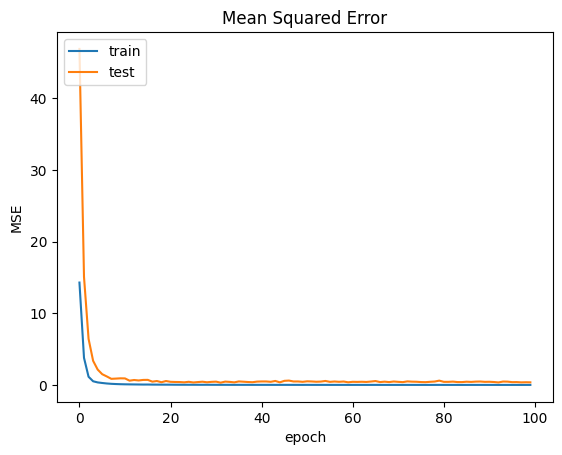

In [90]:
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('Mean Squared Error')
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

8/8 [==============================] - 0s 2ms/step


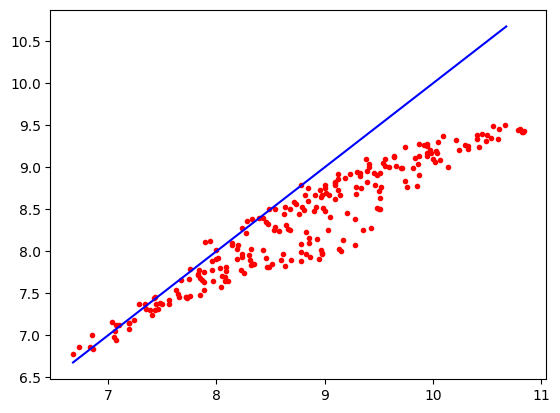

In [91]:
plt.plot(y_test, rnn_mto1_func.predict(x_test), 'r.')
plt.plot(np.arange(min(y_test), max(y_test)),
         np.arange(min(y_test), max(y_test)), 'b')
plt.show()

8/8 [==============================] - 0s 6ms/step


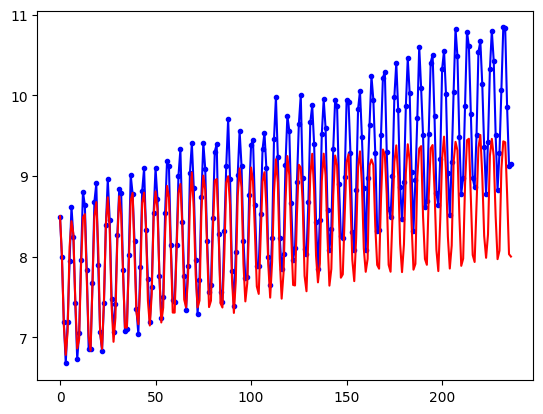

In [92]:
plt.plot(range(y_test.shape[0]), y_test, 'b.-')
plt.plot(range(y_test.shape[0]), rnn_mto1_func.predict(x_test), 'r-')
plt.show()